In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   ## Visualize library
import seaborn as sb 

## make notebook more clean by not show the warning
import warnings
warnings.filterwarnings("ignore")

## make dataframe show only 2 digits float 
pd.options.display.float_format = '{:.2f}'.format
pd.set_option("max_columns", None)


%matplotlib inline


# Hotel Reservations and Cancelations: What Do Impact Them?

---

# Introduction

---
Getting more reservations on one hand and preventing cancelation are two main factors determining a hotel's revenue. 
Therefore, My main goal in this project is to get more insights about these two matrics. To this end, I used hotel demand data from Kaggel, to take a closer look at the following questions:

- What is the cancelation difference between hotels and resorts?
- Where do guests who canceled come from?
- Which month does have the highest net reservations? 
- How is the booking and cacelation per market segment?

In [38]:
# read data
df = pd.read_csv("hotel_bookings.csv")

In [10]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,nan,nan,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,nan,nan,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,nan,nan,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.00,nan,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.00,nan,0,Transient,98.00,0,1,Check-Out,2015-07-03


In [163]:
df.shape

(119390, 32)

Three questions to be answered:
1. How is the demand for hotels over time? 
2. which month have the highest demand? (net demand) does it vaies based on the hotel type?
3. Is there a significat differences in cancelation rate between Resort Hotel and City Hotel
4. How well can we predict whether a booking gets canceled? What aspects correlates well with the cancelation?
5. How has the importance of travel agency changed over time? can we say they plays more important role in travel industry? (market segment/ proporstion of net demand can be the metric) 


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

# Part I: What is the cancelation difference between hotels and resorts?

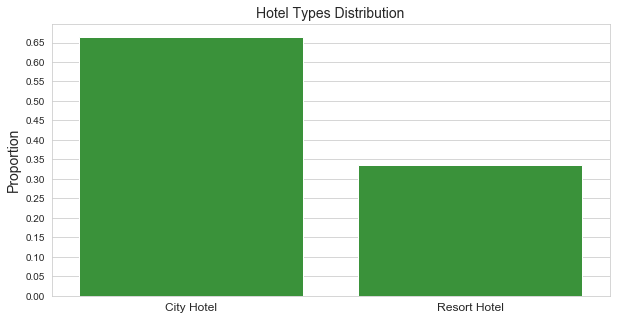

In [156]:
# the two categorical variables in my sample are hotel and arrival_date_month
# let's see how the demand is based on these two variables
plt.figure(figsize = [10,5])

n_points = df.shape[0]
max_count = df.hotel.value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

hotel_order = df.hotel.value_counts().index

base_color = sb.color_palette()[2]
sb.countplot(data = df, x = 'hotel', color = base_color, order = hotel_order)
plt.title('Hotel Types Distribution', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('Proportion', fontsize=14)
ax1 = plt.axes()
x_axis = ax1.xaxis
x_axis.set_label_text('foo')
x_axis.label.set_visible(False);

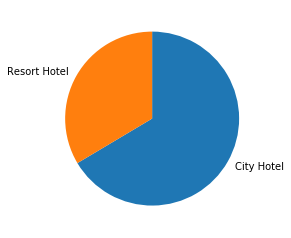

In [115]:
# using Pie Chart
sorted_counts = df.hotel.value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
       counterclock = False);
#plt.axis('Square')

In [58]:
new_col_names = ['Total Reservations' ,'Total Cancellation']
d = {'hotel': 'count', 'is_canceled': 'sum'}
df_hotel_type = df.groupby('hotel').agg(d)
df_hotel_type.columns = new_col_names
df_hotel_type = df_hotel_type.reset_index(col_level=0)
df_hotel_type["OK Reservations"] = df_hotel_type["Total Reservations"] - df_hotel_type["Total Cancellation"]
df_hotel_type["Cancellation %"] = df_hotel_type["Total Cancellation"] / df_hotel_type["Total Reservations"] *100
df_hotel_type["OK Reservation %"] = df_hotel_type["OK Reservations"] / df_hotel_type["Total Reservations"] *100
df_hotel_type.head()

,hotel,Total Reservations,Total Cancellation,OK Reservations,Cancellation %,OK Reservation %
0,City Hotel,79330,33102,46228,41.73,58.27
1,Resort Hotel,40060,11122,28938,27.76,72.24


In [59]:
# My learning: How to remove the levels in the column name
#df_hotel_type.columns = df_hotel_type.columns.droplevel(0)

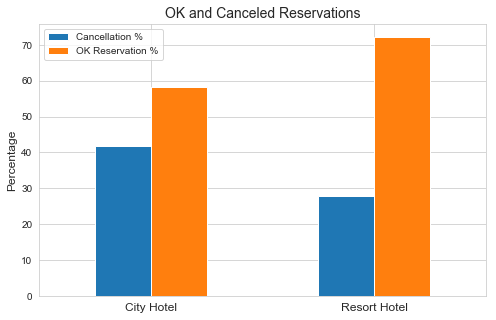

In [157]:
df_hotel_type.plot(x="hotel", y=["Cancellation %", "OK Reservation %"], kind="bar", figsize=(8,5))
plt.title('OK and Canceled Reservations', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.ylabel('Percentage', fontsize=12)
ax1 = plt.axes()
x_axis = ax1.xaxis
x_axis.set_label_text('foo')
x_axis.label.set_visible(False);

# Part II: Where do guests who canceled come from?

In [89]:
# get the cancled by country
canceled_country_df = pd.DataFrame(df.loc[df["is_canceled"] == 1]["country"].value_counts())
canceled_country_df.rename(columns={"country": "Number of Guests Who Canceled"}, inplace=True)
total_guests_canceled = canceled_country_df["Number of Guests Who Canceled"].sum()
canceled_country_df["Guests Canceled in %"] = round(canceled_country_df["Number of Guests Who Canceled"] / total_guests_canceled * 100, 2)
canceled_country_df
canceled_country_df["country"] = canceled_country_df.index
canceled_country_df.head()


,Number of Guests Who Canceled,Guests Canceled in %,country
PRT,27519,62.32,PRT
GBR,2453,5.56,GBR
ESP,2177,4.93,ESP
FRA,1934,4.38,FRA
ITA,1333,3.02,ITA


In [133]:
import plotly.express as px
# show on map
guest_map = px.choropleth(canceled_country_df,
                    locations=canceled_country_df.index,
                    color=canceled_country_df["Guests Canceled in %"], 
                    hover_name=canceled_country_df.index, 
                    color_continuous_scale=px.colors.sequential.Plasma,
#                     width=1000, 
#                     height=1000,
                    title="Home country of guests who canceled")
guest_map.show()

# Part III: Which month does have the highest net reservations?

In [118]:
df.groupby(['arrival_date_year', 'arrival_date_month']).count()['hotel']

arrival_date_year  arrival_date_month
2015               August                3889
                   December              2920
                   July                  2776
                   November              2340
                   October               4957
                   September             5114
2016               April                 5428
                   August                5063
                   December              3860
                   February              3891
                   January               2248
                   July                  4572
                   June                  5292
                   March                 4824
                   May                   5478
                   November              4454
                   October               6203
                   September             5394
2017               April                 5661
                   August                4925
                   February              4

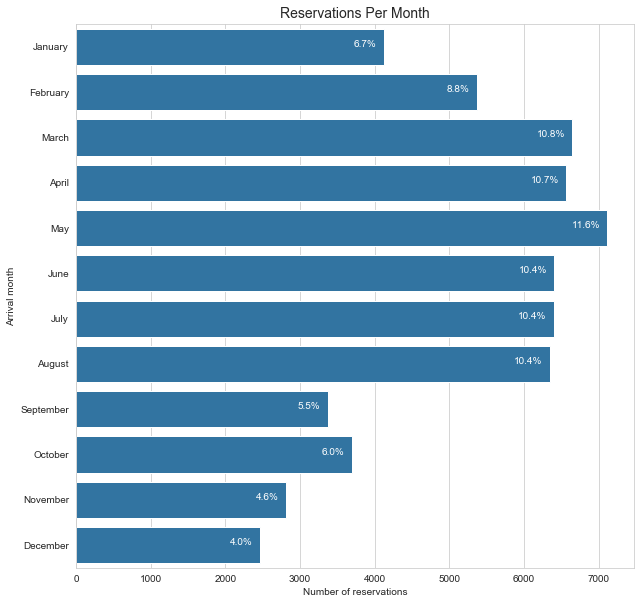

In [162]:
# I exclude 2015 because we have data for half of 2015
df2 = df[(df["is_canceled"] == 0) & (df["arrival_date_year"] > 2015)]
plt.figure(figsize = [10,10])
# because the month is ordinal data, I am not going to sort the by frequency.
level_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ordered_month = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df2['arrival_date_month'] = df2['arrival_date_month'].astype(ordered_month)

# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = df2, y = 'arrival_date_month', color = base_color)
plt.title('Reservations Per Month', fontsize=14)
plt.xlabel('Number of reservations')
plt.ylabel('Arrival month');
locs, labels = plt.yticks()


# # add the annotation
n_points = df2.shape[0]
month_count = df2['arrival_date_month'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    #get the text property for the label to get the correct count
    count = month_count[label.get_text()]    
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    
    #print the annotation just below the top of the bar
    plt.text(count-100, loc, pct_string, ha = 'right', color = 'w')


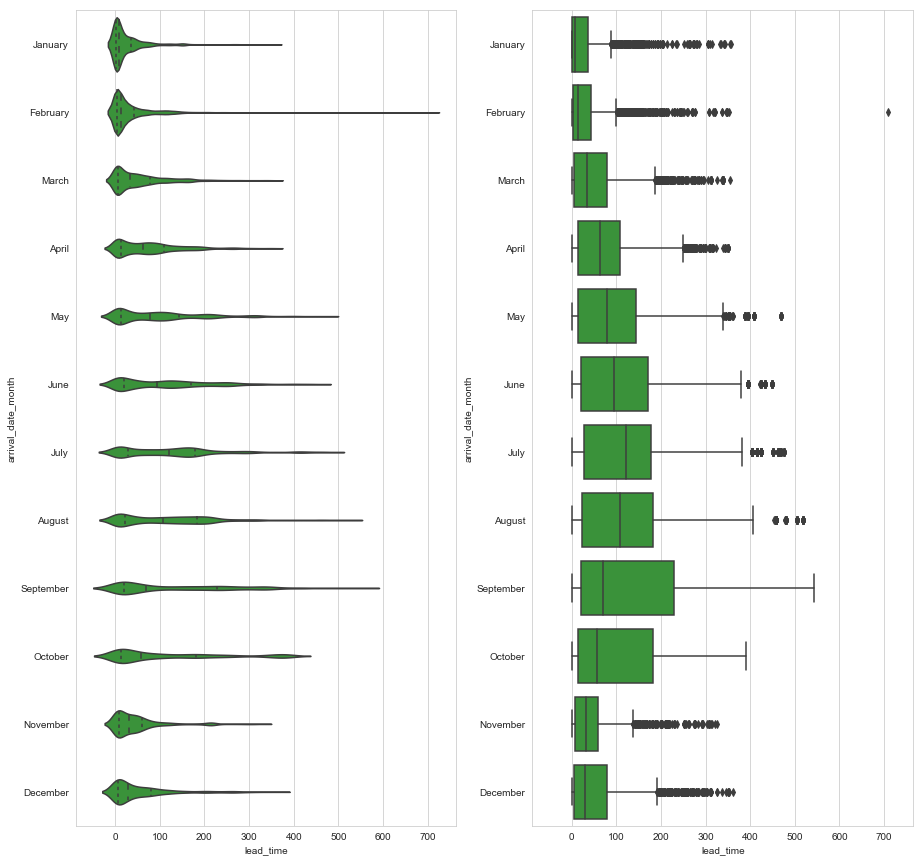

In [159]:
plt.figure(figsize = [15,15])
base_color = sb.color_palette()[2]


# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df2, x = 'lead_time', y = 'arrival_date_month',  inner='quartile',color=base_color)

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df2, x = 'lead_time', y = 'arrival_date_month', color=base_color)
plt.xlim(ax1.get_xlim());



## How does the reservation vary over the year for each hotel type?

In [160]:
new_col_names = ['Total Net Reservations']
d = {'hotel': 'count'}
df_trend = df2.groupby(['arrival_date_month', 'hotel']).agg(d)
df_trend.columns = new_col_names
df_trend = df_trend.reset_index(col_level=0)

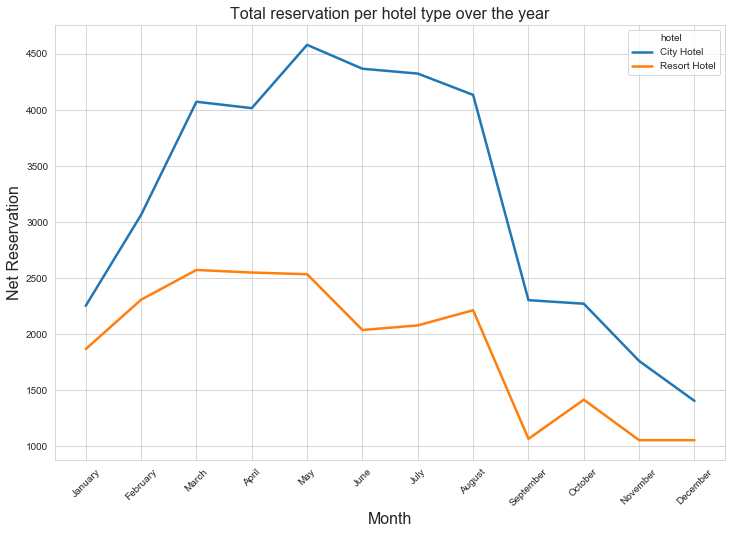

In [161]:
# lineplot with standard deviation:
plt.figure(figsize=(12, 8))
sb.set_style("whitegrid")
sb.lineplot(x = "arrival_date_month", y="Total Net Reservations", hue="hotel", data=df_trend, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Total reservation per hotel type over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Net Reservation", fontsize=16)
plt.show()